In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Importo datos y excluyo los distritos de BCN

In [3]:
df = pd.read_excel('/Users/pablo/Desktop/Drive pablo.fdzalb/6o curso/TFG economía/Datos/Indices_vivienda_distritosAMB.xlsx', sheet_name = 'Distritos')
df = df.drop(labels = df[df['LITMUN'] == 'Barcelona'].index, axis = 0)
print(df['LITMUN'].unique())
print(df['LITMUN'].nunique())

['Badalona' 'Badia del Vallès' 'Barberà del Vallès' 'Begues'
 'Castellbisbal' 'Castelldefels' 'Cerdanyola del Vallès' 'Cervelló'
 'Corbera de Llobregat' 'Cornellà de Llobregat' 'Esplugues de Llobregat'
 'Gavà' "Hospitalet de Llobregat, L'" 'Molins de Rei' 'Montcada i Reixac'
 'Montgat' 'Pallejà' 'Palma de Cervelló, La' 'Papiol, El'
 'Prat de Llobregat, El' 'Ripollet' 'Sant Adrià de Besòs'
 'Sant Andreu de la Barca' 'Sant Boi de Llobregat'
 'Sant Climent de Llobregat' 'Sant Cugat del Vallès'
 'Sant Feliu de Llobregat' 'Sant Joan Despí' 'Sant Just Desvern'
 'Sant Vicenç dels Horts' 'Santa Coloma de Cervelló'
 'Santa Coloma de Gramenet' 'Tiana' 'Torrelles de Llobregat' 'Viladecans']
35


In [4]:
df

,CPRO,LITPRO,CUMUN,LITMUN,CUDIS,BI_ALVHEPCO_TVC_15,BI_ALVHEPCO_TVU_15,ALQM2mes_LV_M_VC_15,ALQM2mes_LV_25_VC_15,ALQM2mes_LV_75_VC_15,...,pop_density,industrial_waste,agriculture_workers_rate,industry_workers_rate,construction_workers_rate,services_workers_rate,population_growth,new_houses,places_of_interest,mob_estud
0,8,Barcelona,8015,Badalona,801501,424.0,115.0,7.381939,5.724355,9.333333,...,10529.1,15748.85,0.000354,0.102235,0.113163,0.784248,-0.130000,3.2,0.216460,0.891922
1,8,Barcelona,8015,Badalona,801502,690.0,89.0,7.267442,5.793288,8.620690,...,10529.1,15748.85,0.000354,0.102235,0.113163,0.784248,0.054602,3.2,0.216460,0.891922
2,8,Barcelona,8015,Badalona,801503,695.0,110.0,7.739814,6.288410,9.655414,...,10529.1,15748.85,0.000354,0.102235,0.113163,0.784248,0.151405,3.2,0.216460,0.891922
3,8,Barcelona,8015,Badalona,801504,727.0,67.0,7.575758,6.378369,8.698705,...,10529.1,15748.85,0.000354,0.102235,0.113163,0.784248,0.022071,3.2,0.216460,0.891922
4,8,Barcelona,8015,Badalona,801505,426.0,79.0,7.558140,6.274086,9.180327,...,10529.1,15748.85,0.000354,0.102235,0.113163,0.784248,0.100403,3.2,0.216460,0.891922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,8,Barcelona,8245,Santa Coloma de Gramenet,824506,657.0,13.0,7.265396,6.126530,8.333333,...,17041.3,2348.38,0.000359,0.054475,0.152709,0.792457,0.242798,0.3,0.109715,0.855187
122,8,Barcelona,8282,Tiana,828201,205.0,144.0,7.890675,6.561957,9.388853,...,1133.2,3352.41,0.007458,0.079748,0.090075,0.822719,0.124611,13.4,0.110803,0.531646
123,8,Barcelona,8289,Torrelles de Llobregat,828901,120.0,109.0,6.576923,5.084746,8.148438,...,451.8,92.40,0.006591,0.081921,0.155367,0.756121,0.081449,0.3,NaN,0.591304
124,8,Barcelona,8301,Viladecans,830101,901.0,79.0,7.352941,6.076345,8.677083,...,3270.0,4535.18,0.002259,0.131495,0.112635,0.753612,0.045445,1.6,0.164646,0.850964


# 2. Gráficos y tablas que incluimos en el trabajo (excluyendo distritos de BCN)

### Five number summaries de los precios

In [5]:
print('Descripción de los precios medianos por m2 de viviendas colectivas:')
df['ALQM2mes_LV_M_VC_21'].describe()

Descripción de los precios medianos por m2 de viviendas colectivas:


count    114.000000
mean       9.799837
std        1.563789
min        6.353846
25%        8.649288
50%        9.638554
75%       10.792149
max       15.384615
Name: ALQM2mes_LV_M_VC_21, dtype: float64

In [6]:
print('Descripción de los precios medianos por m2 de viviendas unifamiliares:')
df['ALQM2mes_LV_M_VU_21'].describe()

Descripción de los precios medianos por m2 de viviendas unifamiliares:


count    90.000000
mean      7.228644
std       2.380052
min       2.872412
25%       5.673799
50%       6.734657
75%       8.295524
max      13.888889
Name: ALQM2mes_LV_M_VU_21, dtype: float64

### Side-by-side bar chart

In [7]:
# Primero voy a calcular la media de las medianas de cada distrito y para cada año de cada tipo de viviendas, creando un DataFrame para cada tipo de vivienda.
# Para calcular las medias, voy a utilizar una media ponderada, obtenida a partir del número de viviendas de cada tipo para cada distrito (en la variable
# "BI_ALVHEPCO_TVC_AA" y "BI_ALVHEPCO_TVU_AA").

## Cálculo de las medias ponderadas para las viviendas colectivas 

weights_price_VC_2015 = (df['ALQM2mes_LV_M_VC_15'] * df['BI_ALVHEPCO_TVC_15']) / df['BI_ALVHEPCO_TVC_15'].sum()
mean_price_VC_2015 = weights_price_VC_2015.sum()

weights_price_VC_2016 = (df['ALQM2mes_LV_M_VC_16'] * df['BI_ALVHEPCO_TVC_16']) / df['BI_ALVHEPCO_TVC_16'].sum()
mean_price_VC_2016 = weights_price_VC_2016.sum()

weights_price_VC_2017 = (df['ALQM2mes_LV_M_VC_17'] * df['BI_ALVHEPCO_TVC_17']) / df['BI_ALVHEPCO_TVC_17'].sum()
mean_price_VC_2017 = weights_price_VC_2017.sum()

weights_price_VC_2018 = (df['ALQM2mes_LV_M_VC_18'] * df['BI_ALVHEPCO_TVC_18']) / df['BI_ALVHEPCO_TVC_18'].sum()
mean_price_VC_2018 = weights_price_VC_2018.sum()

weights_price_VC_2019 = (df['ALQM2mes_LV_M_VC_19'] * df['BI_ALVHEPCO_TVC_19']) / df['BI_ALVHEPCO_TVC_19'].sum()
mean_price_VC_2019 = weights_price_VC_2019.sum()

weights_price_VC_2020 = (df['ALQM2mes_LV_M_VC_20'] * df['BI_ALVHEPCO_TVC_20']) / df['BI_ALVHEPCO_TVC_20'].sum()
mean_price_VC_2020 = weights_price_VC_2020.sum()

weights_price_VC_2021 = (df['ALQM2mes_LV_M_VC_21'] * df['BI_ALVHEPCO_TVC_21']) / df['BI_ALVHEPCO_TVC_21'].sum()
mean_price_VC_2021 = weights_price_VC_2021.sum()

## Cálculo de las medias ponderadas para las viviendas unifamiliares 

weights_price_VU_2015 = (df['ALQM2mes_LV_M_VU_15'] * df['BI_ALVHEPCO_TVU_15']) / df['BI_ALVHEPCO_TVU_15'].sum()
mean_price_VU_2015 = weights_price_VU_2015.sum()

weights_price_VU_2016 = (df['ALQM2mes_LV_M_VU_16'] * df['BI_ALVHEPCO_TVU_16']) / df['BI_ALVHEPCO_TVU_16'].sum()
mean_price_VU_2016 = weights_price_VU_2016.sum()

weights_price_VU_2017 = (df['ALQM2mes_LV_M_VU_17'] * df['BI_ALVHEPCO_TVU_17']) / df['BI_ALVHEPCO_TVU_17'].sum()
mean_price_VU_2017 = weights_price_VU_2017.sum()

weights_price_VU_2018 = (df['ALQM2mes_LV_M_VU_18'] * df['BI_ALVHEPCO_TVU_18']) / df['BI_ALVHEPCO_TVU_18'].sum()
mean_price_VU_2018 = weights_price_VU_2018.sum()

weights_price_VU_2019 = (df['ALQM2mes_LV_M_VU_19'] * df['BI_ALVHEPCO_TVU_19']) / df['BI_ALVHEPCO_TVU_19'].sum()
mean_price_VU_2019 = weights_price_VU_2019.sum()

weights_price_VU_2020 = (df['ALQM2mes_LV_M_VU_20'] * df['BI_ALVHEPCO_TVU_20']) / df['BI_ALVHEPCO_TVU_20'].sum()
mean_price_VU_2020 = weights_price_VU_2020.sum()

weights_price_VU_2021 = (df['ALQM2mes_LV_M_VU_21'] * df['BI_ALVHEPCO_TVU_21']) / df['BI_ALVHEPCO_TVU_21'].sum()
mean_price_VU_2021 = weights_price_VU_2021.sum()

## Creación de un DataFrame con las medias para cada año

mean_prices = {'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
                  'Mean_prices_VC': [mean_price_VC_2015, mean_price_VC_2016, mean_price_VC_2017, mean_price_VC_2018, mean_price_VC_2019, mean_price_VC_2020, mean_price_VC_2021],
                  'Mean_prices_VU': [mean_price_VU_2015, mean_price_VU_2016, mean_price_VU_2017, mean_price_VU_2018, mean_price_VU_2019, mean_price_VU_2020, mean_price_VU_2021]}

df_mean_prices = pd.DataFrame(mean_prices)
df_mean_prices

,Year,Mean_prices_VC,Mean_prices_VU
0,2015,7.967723,6.158544
1,2016,8.110457,6.377937
2,2017,8.392041,6.632818
3,2018,8.868998,6.871729
4,2019,9.559666,7.461292
5,2020,9.881319,7.416105
6,2021,10.169480,7.661701


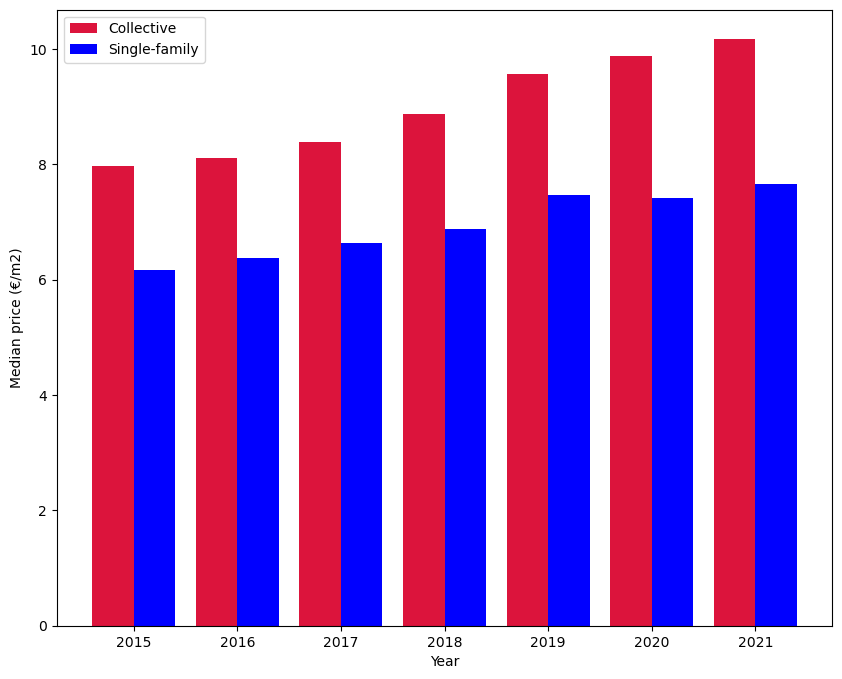

In [8]:
# Ahora voy a crear el side-by-side bar chart
## Primero, determinaré la posición de cada barra en el gráfico
### Datos viviendas colectivas
n = 1
t = 2
d = df_mean_prices['Year'].count()
w = 0.8
x_values1 = [t * element + w * n for element in range(d)]

### Datos viviendas unifamiliares
n = 2
t = 2
d = df_mean_prices['Year'].count()
w = 0.8
x_values2 = [t * element + w * n for element in range(d)]

## Ahora creamos los dos gráficos
plt.figure(figsize = (10,8))
ax = plt.subplot()
plt.bar(x_values1, df_mean_prices['Mean_prices_VC'], color = 'crimson')
plt.bar(x_values2, df_mean_prices['Mean_prices_VU'], color = 'blue')

### Ponemos títulos, leyendas y demás
plt.legend(['Collective', 'Single-family'])
plt.xlabel('Year')
plt.ylabel('Median price (€/m2)')
#plt.title('Median prices for collective and single-family dwellings in the AMB')

### Ajustamos las x-ticks y los nombres para que sean los años
middle_x = [(a + b) / 2.0 for a, b in zip(x_values1, x_values2)]
ax.set_xticks(middle_x)
ax.set_xticklabels(df_mean_prices['Year'])

plt.show()

En otros colores (para el vídeo de defensa).

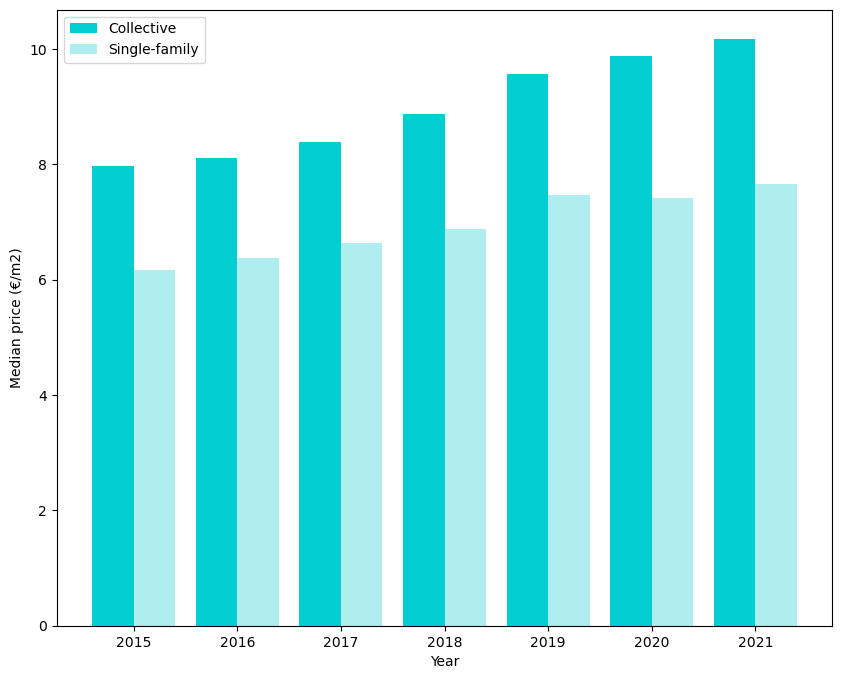

In [9]:
# Ahora voy a crear el side-by-side bar chart
## Primero, determinaré la posición de cada barra en el gráfico
### Datos viviendas colectivas
n = 1
t = 2
d = df_mean_prices['Year'].count()
w = 0.8
x_values1 = [t * element + w * n for element in range(d)]

### Datos viviendas unifamiliares
n = 2
t = 2
d = df_mean_prices['Year'].count()
w = 0.8
x_values2 = [t * element + w * n for element in range(d)]

## Ahora creamos los dos gráficos
plt.figure(figsize = (10,8))
ax = plt.subplot()
plt.bar(x_values1, df_mean_prices['Mean_prices_VC'], color = '#00CED1')
plt.bar(x_values2, df_mean_prices['Mean_prices_VU'], color = 'PaleTurquoise')

### Ponemos títulos, leyendas y demás
plt.legend(['Collective', 'Single-family'])
plt.xlabel('Year')
plt.ylabel('Median price (€/m2)')
#plt.title('Median prices for collective and single-family dwellings in the AMB')

### Ajustamos las x-ticks y los nombres para que sean los años
middle_x = [(a + b) / 2.0 for a, b in zip(x_values1, x_values2)]
ax.set_xticks(middle_x)
ax.set_xticklabels(df_mean_prices['Year'])

plt.show()

### Overlapping histogram - precios

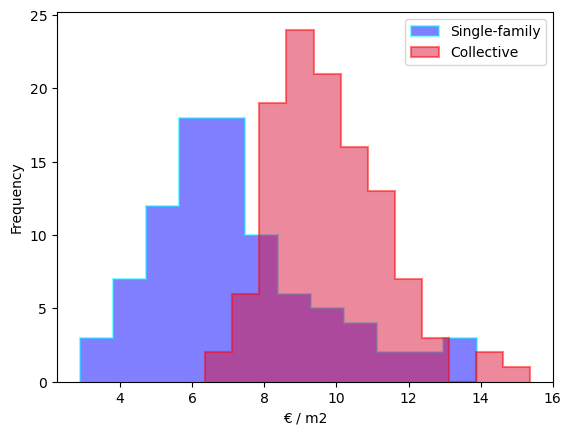

In [10]:
# Con contorno
plt.hist(df['ALQM2mes_LV_M_VU_21'], color = 'blue', label = 'Single-family', density = False, alpha = 0.5, bins = 12, histtype='step', fill = True, edgecolor = 'Aqua', linewidth = 1.5)
plt.hist(df['ALQM2mes_LV_M_VC_21'], color = 'crimson', label = 'Collective', density = False, alpha = 0.5, bins = 12, histtype='step', fill = True, edgecolor = 'Red', linewidth = 1.5)
plt.xlabel('€ / m2')
plt.ylabel('Frequency')
#plt.title('Median prices per m2 for collective and single-family dwellings in 2021')
plt.legend()
plt.show()